In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
import scipy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Dataset importing and display head
dataset = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [3]:
def con_to_bin(x):
    if x=='BENIGN':
        return 0
    if x=='Bot':
        return 1
    
dataset['Label'] = dataset[' Label'].apply(con_to_bin)

In [4]:
dataset.Label.value_counts()

0    188955
1      1956
Name: Label, dtype: int64

In [5]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN,0
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN,0
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN,0
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN,0


In [6]:
df = dataset.drop(columns=[' Destination Port', ' Label'], axis=1)
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,0
1,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,0
2,113757377,545,0,0,0,0,0,0.0,0.000000,0,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,0
3,100126,22,0,616,0,28,28,28.0,0.000000,0,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,54760,4,0,0,0,0,0,0.0,0.000000,0,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [7]:
#Assigning X- independent and y- dependent variable
X = df.drop(columns='Label')
y = df.iloc[:,77]
print(X.shape)
print(y.shape)

(190911, 77)
(190911,)


In [8]:
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
#One way of feature selection
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

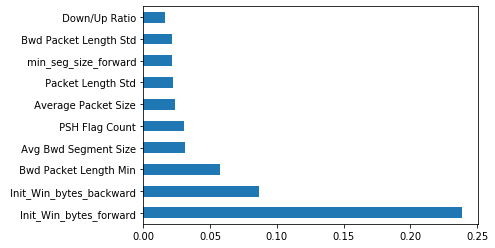

In [10]:
feat_importances = pd.Series(etc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [8]:
#Handling imbalanced data
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
X_res,y_res=smk.fit_sample(X,y)

Using TensorFlow backend.


In [9]:
#Shapes of ordiginal data
(X.shape), (y.shape)

((190911, 77), (190911,))

In [10]:
#Shapes of resampled data
(X_res.shape), (y_res.shape)

((377678, 77), (377678,))

In [11]:
#Count of y_res for Benign:0 and Bot:1 after resampling  
from collections import Counter
print('Resample dataset shape {}'.format(Counter(y_res)))

Resample dataset shape Counter({0: 188839, 1: 188839})


In [25]:
X_res[190909:190920]

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
190909,1029442,3,3,0,18,0,0,0.000000,0.000000,6,...,0,28,0.0,0.0,0,0,0.0,0.0,0,0
190910,38,1,1,6,6,6,6,6.000000,0.000000,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
190911,18,1,1,6,6,6,6,6.000000,0.000000,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
190912,77117,4,3,207,134,195,0,51.750000,95.541876,128,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
190913,28,1,1,6,6,6,6,6.000000,0.000000,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
190914,33,1,1,6,6,6,6,6.000000,0.000000,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
190915,40,1,1,6,6,6,6,6.000000,0.000000,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
190916,86085,4,3,2341,135,1895,0,533.990953,936.530626,128,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
190917,77017,4,3,208,134,196,0,52.009438,96.060527,128,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
190918,1045178,3,3,0,18,0,0,0.000000,0.000000,6,...,0,28,0.0,0.0,0,0,0.0,0.0,0,0


In [12]:
#Importing Randomsearch cross validation
from sklearn.model_selection import RandomizedSearchCV

In [13]:
import xgboost as xgb
classifier=xgb.XGBClassifier()

In [17]:
#Hyperparameter optimization
parameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 18, 20],
 "min_child_weight" : [ 1, 3, 5, 7, 8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9 ]   
}

In [29]:
#Providing XGboost classifier to random search cross validation for selecting best parameters
#Choose 'roc_auc' as I now have balanced the dataset and for better results
random_search=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [30]:
#Implementing random search CV by providing input features of resampled data
random_search.fit(X_res,y_res)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9],
                  

In [31]:
#Paramaters estimator and optimized results
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [14]:
#Assigning an object to XGBclassifier
gbm = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [15]:
from sklearn.metrics import accuracy_score 

In [35]:
#Importing Stratified K fold cross validation and Standard Scaler
from sklearn.model_selection import StratifiedKFold

#from sklearn.preprocessing import StandardScaler

#Implementing Stratified K fold CV
accuracy=[]
skf=StratifiedKFold(n_splits=100, random_state=None)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
#Removed the Standardizing part as it not required for classification problem and not giving better results
    
    #X_norm_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
    
    #X_norm_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)
    
    #X_train_upsample, y_train_upsample = smk.fit_resample(X_norm_train, y_train)
    
    #X_test_upsample, y_test_upsample = smk.fit_resample(X_norm_test, y_test)
    
    model = gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(X_test)
    score_val=accuracy_score(y_test, predictions)
    accuracy.append(score_val)
    
print(accuracy) 
   

[0.9944400317712471, 0.9986761980407731, 0.9970876356897008, 0.9994704792163093, 0.9992057188244639, 0.9994704792163093, 0.9965581149060101, 0.9994704792163093, 0.9997352396081546, 0.9973523960815462, 0.9989409584326184, 0.9994704792163093, 0.9989409584326184, 0.9968228752978554, 0.9994704792163093, 0.9994704792163093, 0.9992057188244639, 0.9992057188244639, 0.9976171564733916, 1.0, 0.9981466772570824, 0.9997352396081546, 0.9994704792163093, 0.9984114376489277, 1.0, 0.9994704792163093, 0.9986761980407731, 0.9997352396081546, 1.0, 0.9992057188244639, 0.9992057188244639, 0.9997352396081546, 0.9997352396081546, 0.9992057188244639, 0.9984114376489277, 1.0, 0.9997352396081546, 1.0, 0.9986761980407731, 0.9997352396081546, 0.9986761980407731, 0.9997352396081546, 1.0, 0.9997352396081546, 1.0, 1.0, 0.9997352396081546, 0.9997352396081546, 0.9994704792163093, 0.9997352396081546, 0.9984114376489277, 0.9994704792163093, 0.9981466772570824, 1.0, 0.9984114376489277, 0.9997352396081546, 0.999470479216

In [36]:
#Accuracy evaluation
np.array(accuracy).mean()

0.9992348039034209

In [51]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[[1884    4]
 [   0 1888]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1888
           1       1.00      1.00      1.00      1888

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776



In [40]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (373902, 77)
y_train: (373902,)
X_test: (3776, 77)
y_test: (3776,)


In [42]:
y_test.tail(3776).value_counts()

1    1888
0    1888
Name: Label, dtype: int64

In [49]:
#from pylab import rcParams
#plot_importance(gbm, max_num_features=10)
#rcParams['figure.figsize'] = 4,4

In [52]:
from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_test, predictions)

Text(0.5, 1.0, 'Precision-Recall curve: ')

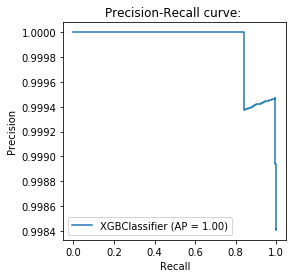

In [53]:
#Precision recall curve plotting
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

pr = plot_precision_recall_curve(gbm, X_test, y_test)
pr.ax_.set_title('Precision-Recall curve: '.format(avg_precision))

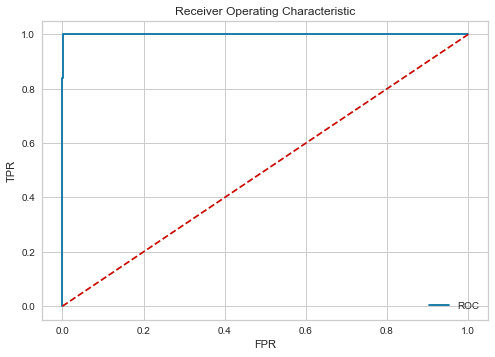

In [87]:
# calculate the fpr and tpr for all thresholds of the classification

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
prob = model.predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'ROC')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [64]:
#from yellowbrick.model_selection import LearningCurve
#graph = LearningCurve(gbm, cv=skf, scoring='accuracy')

#graph.fit(X_train, y_train)
#graph.show()   

In [50]:
#Evaluating top features
cols_list = list(X_res.columns)
feature_importances = pd.DataFrame(gbm.feature_importances_,
                                   index = cols_list,
                                    columns=['F1 score']).sort_values('F1 score', ascending=False)
feature_importances.head(10)

,F1 score
Subflow Bwd Bytes,0.108531
Fwd PSH Flags,0.102174
Packet Length Mean,0.101463
Bwd Packet Length Min,0.090122
Avg Bwd Segment Size,0.087995
Bwd Header Length,0.068318
Bwd Packet Length Std,0.058299
Bwd IAT Total,0.050155
min_seg_size_forward,0.048599
Total Length of Bwd Packets,0.035884


In [16]:
from sklearn.model_selection import StratifiedKFold

#from sklearn.preprocessing import StandardScaler

#Implementing Stratified K fold CV
accuracy=[]
skf=StratifiedKFold(n_splits=100, random_state=None)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]

[Text(200.88000000000002, 190.26, 'X[11] <= 45.333\ngini = 0.5\nsamples = 3776\nvalue = [1884, 1892]'),
 Text(133.92000000000002, 135.9, 'X[53] <= 5.403\ngini = 0.394\nsamples = 2590\nvalue = [698, 1892]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 406\nvalue = [406, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[65] <= 233.0\ngini = 0.232\nsamples = 2184\nvalue = [292, 1892]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.148\nsamples = 2058\nvalue = [166, 1892]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 1186\nvalue = [1186, 0]')]

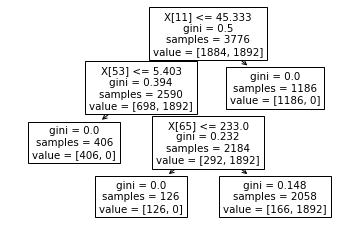

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
global_model = tree.DecisionTreeClassifier(max_depth=3)
model = gbm.fit(X_train,y_train)
predictions = gbm.predict(X_test)
global_model = global_model.fit(X_test,predictions)
tree.plot_tree(global_model)
#plt.savefig('DT(5).png')

In [44]:
print(tree.export_text(global_model))

|--- feature_53 <= 45.33
|   |--- feature_11 <= 5.40
|   |   |--- class: 0
|   |--- feature_11 >  5.40
|   |   |--- feature_65 <= 233.00
|   |   |   |--- class: 0
|   |   |--- feature_65 >  233.00
|   |   |   |--- class: 1
|--- feature_53 >  45.33
|   |--- class: 0



In [27]:
X_res.columns

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SY

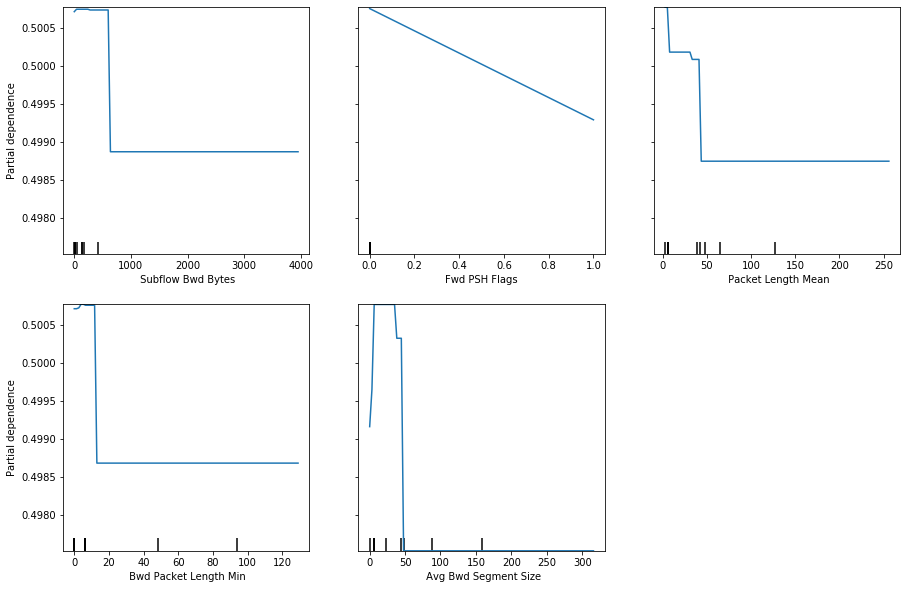

In [40]:
from sklearn.inspection import plot_partial_dependence
#In the below example we show how to create a grid of partial dependence plots: 
    #two one-way PDPs for the features 0 and 1 
features = X_res[[' Subflow Bwd Bytes','Fwd PSH Flags',' Packet Length Mean',' Bwd Packet Length Min',' Avg Bwd Segment Size']] 
#We can pick whichever features are important or interesting
plot_partial_dependence(gbm, X_test, features)
plt.gcf()
plt.savefig('ParDep for xgb for top five.png')
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

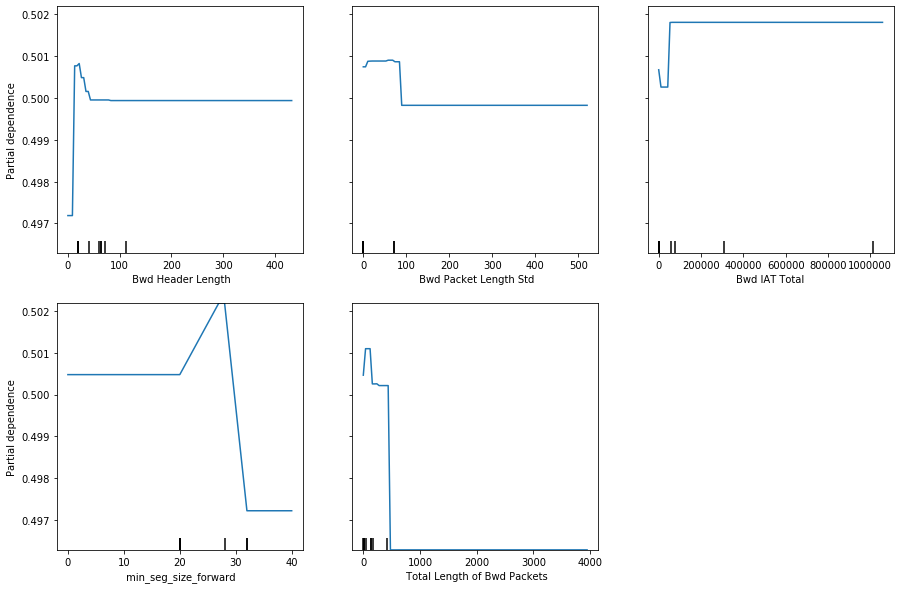

In [39]:
features_2 = X_res[[' Bwd Header Length',' Bwd Packet Length Std','Bwd IAT Total',' min_seg_size_forward',' Total Length of Bwd Packets']]
plot_partial_dependence(gbm, X_test, features_2)
plt.gcf()
plt.savefig('ParDep for xgb for last five.png')

In [40]:
X_test.iloc[:,53]

188817    317.0
188818    167.0
188819    156.0
188820    206.0
188821      6.0
          ...  
377673      6.0
377674      6.0
377675     35.0
377676      6.0
377677      6.0
Name:  Avg Bwd Segment Size, Length: 3776, dtype: float64

In [41]:
conda install -c conda-forge lime

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\adity\Anaconda3

  added / updated specs:
    - lime


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    lime-0.2.0.0               |     pyh9f0ad1d_0         229 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  lime               conda-forge/noarch::lime-0.2.0.0-pyh9f0ad1d_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.12-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1




lime-0.2.0.0  



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
#want class_names = list of levels of target vector
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(X_train.columns), class_names=y_train, discretize_continuous=True)
# Choose random prediction to explain (can be anyone we want)
i = np.random.randint(0, test.shape[0])
#num_features = number of features we wish to use for local interpretation (lower = simpler interpretation but less fidelity to actual model)
exp = explainer.explain_instance(X_test[i], gbm.predict_proba, num_features=2)
exp.show_in_notebook(show_table=True, show_all=False)